<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Convolutional Neural Networks
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 4: Topic 43</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [83]:
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Convolution Neural Networks (CNNs)
- An architecture designed for visual pattern recognition
- Classification/regression on image data

Why a new architecture?

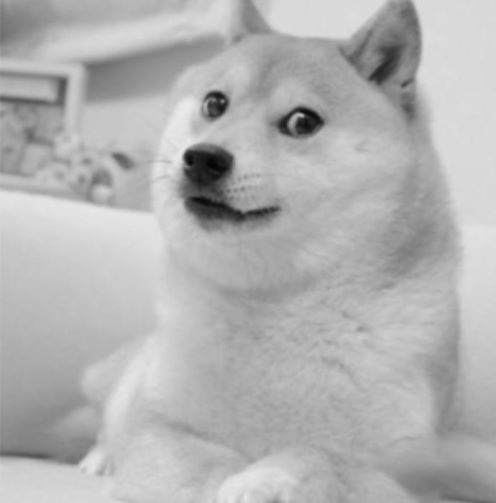

In [84]:
dogey = Image.open("Images/dog.jpg")
dogey_grayscale = ImageOps.grayscale(dogey)
display(dogey_grayscale)

In [3]:
dg_array = np.array(dogey_grayscale)
dg_array

array([[154, 150, 149, ..., 217, 216, 216],
       [153, 149, 147, ..., 217, 216, 216],
       [150, 146, 145, ..., 217, 216, 216],
       ...,
       [214, 214, 213, ..., 127, 128, 129],
       [214, 213, 213, ..., 120, 122, 123],
       [213, 213, 212, ..., 116, 118, 120]], dtype=uint8)

Pixel values: high local correlations across columns/rows.

The problem with standard neural network (aka multilayer perceptron network):
- let's flatten the doge and inspect features.

In [4]:
flattened_input = np.ravel(dg_array)
len(flattened_input)

249488

All those features go in to MLP:


<center><img src = "Images/mlp_image.jfif" width =600/></center>
<center> Number of weights to first layer: huge

Treats features as independent:
- Large number of features.
- Dense connections: large number of weights to tune
- Weights trying to learn pixel-level correlations

Not a good idea. Too specific.

Want to start model at a much higher level of feature abstraction

#### Building up the convolutional network

<center><img src = "Images/mlp-convolution-transform.webp" width = 500>

Cutting connections: 
- not all pixel-pixel interactions relevant.
- only pass neighboring pixels into given node at next layer.

**Keeps information local**

<img src = "Images/convolution-mlp-mapping.webp" >

Full computation corresponds to **convolution**

$$ \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{bmatrix} *
\begin{bmatrix}
w_1 & w_2 \\
w_3 & w_4
\end{bmatrix} = \\
\begin{bmatrix}
w_1x_{11} + w_2x_{12} + w_3x_{21} + w_4x_{22} & w_1x_{12} + w_2x_{13} + w_3x_{22} + w_4x_{23} \\
w_1x_{21} + w_2x_{22} + w_3x_{31} + w_4x_{32} & w_1 x_{22} + w_2x_{23} + w_3x_{32} + w_4x_{33}
\end{bmatrix}$$


<center><img src = "Images/convolution-mlp-mapping.webp" width = 400 ></center>


Single node: element-wise multiplication and add them up.
- A dot product between shared weights and relevant local inputs.

Convolution in non-flattened output representation:
- Sliding window with element-wise multiplication/sum
- Creates new image (2D matrix).

<center><img src = "Images/convolution.gif" ></center>

<center><img src = "Images/convolution-mlp-mapping.webp" width = 400 ></center>

Why applying same weights for the different computations?

**Weight sharing:**

Idea is that same set of weight patterns useful throughout image:
- the same kinds of correlations keep showing up across different local regions.

<img src = "Images/convolution-mlp-mapping.webp" >

Weights acts as filter:
- regions with no vertical edge are zero.
- regions with vertical edge register value.
- useful in many local areas of image

**Same weight set applied to many local areas**

<img src = "Images/edge_detector_large.png" >

Other useful lower-level image features (benefiting from weight sharing):

- Corner/special points
- region/blob detection

<img src = "Images/corner_blobs.jpg" >

Much higher level features:
- don't need to model pixel level structure

With colors we have three color dimensions (R/G/B):
- Filter has three channels (R/G/B)
- R channel applies a weight set to red intensity pixel values
- G channel applies another weight set to green, ...

- Element-wise multiplication/addition channel-wise
- Add result from all channels together.

<img src = "Images/convwithcolor.png" >

- Can manually construct sets of filters and feature engineer.
- But main idea of CNN is to *learn* these filters.
- Given weight matrix feature engineers: CNN learning image feature extraction.

Typically, want to learn multiple filters at the same time:
- Apply each filter/convolve on inputs seperately.
- Creates stacked output (3D numpy array)

<img src = "Images/conv_manyfilters_expanded.jpg" width = 200/>

Multiple filters with colors:
- Each filter has number of channels
- Equaling depth of input layer.

Depth of output is equal to number of filters.

<img src = "Images/convcolormultifilters.png"  >

After each convolution operation: 
- apply nonlinear activation to output elementwise.

<img src = "Images/conv_activation.png" >

Putting it together: a schematic CNN on a gray-scale image.

<img src = "Images/conv_manyfilters.png" />

Haven't seen subsampling/aggregation/pooling yet.

Putting it together: a schematic CNN on a color image.

<img src = "Images/colorcnn.png" >

Haven't seen subsampling/aggregation/pooling yet.


#### Subsampling/aggregation: pooling layers

- Pooling performs aggregation within window.
- Stride pooling window across input.
- Returns reduced representation.


*Most common aggregation*: **max pooling**

<img src = "Images/maxpool.gif" >

**Intuition behind max pooling**
- Reducing representation size.
- Max: selecting on most distinctive feature.
- Makes insensitive to translation/rotation of features.

<img src = "Images/maxpool.gif" >

<center><img src = "Images/translation_invariance_maxpool.jpg" ></center>

Repeated convolution/pooling:
- Creates smaller feature maps laterally but more of them.
- Encodes higher level features and condenses info.

<img src = "Images/conv_with_pooling_network.jpeg" >

Final steps involves flattening/connecting to dense fully-connected network:
- take high level condensed features.
- learn correct combinations of them.
- put into sigmoid/softmax

<img src = "Images/conv_with_pooling_network.jpeg" >

Apply this to the MNIST digit recognition problem:

Some old imports:

In [9]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

The new layers

In [12]:
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

Load MNIST

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [14]:
train_images.shape

(60000, 28, 28)

In [38]:
test_images.shape

(10000, 28, 28, 1)

In [41]:
train_labels = to_categorical(train_labels)

Conv2D takes tensors of shape:
- (image_height, image_width, color_channels) for each image
- MNIST has one color channel (grayscale).

In [42]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

Normalize data

In [43]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255, test_images / 255

Create the CNN sequential model.

In [75]:
model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)))
# max pool in 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

Let display the architecture of our model so far.

In [76]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

#### Compile and train the model

In [77]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [78]:
history_cnn = model.fit(train_images, train_labels, epochs= 20, validation_split = 0.2, batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.7018 - accuracy: 0.7637 - val_loss: 0.2303 - val_accuracy: 0.9320
Epoch 2/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1815 - accuracy: 0.9440 - val_loss: 0.1473 - val_accuracy: 0.9572
Epoch 3/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1223 - accuracy: 0.9620 - val_loss: 0.1145 - val_accuracy: 0.9663
Epoch 4/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0967 - accuracy: 0.9696 - val_loss: 0.0858 - val_accuracy: 0.9726
Epoch 5/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0815 - accuracy: 0.9743 - val_loss: 0.0831 - val_accuracy: 0.9758
Epoch 6/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0695 - accuracy: 0.9783 - val_loss: 0.0801 - val_accuracy: 0.9751
Epoch 7/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0608 - accuracy: 0.9807 - val_loss: 0.0693 -

#### Evaluate the model

In [85]:
_, test_acc = model.evaluate(test_images, to_categorical(test_labels))

313/313 [==============================] - 3s 8ms/step - loss: 0.0562 - accuracy: 0.9845


In [88]:
print(test_acc)

0.984499990940094


Can we improve this by regularization techniques?

In [108]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
from tensorflow.keras.layers import BatchNormalization

In [129]:
model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1), kernel_regularizer = l2(1e-2) ))

model2.add(BatchNormalization())
# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(1e-2) ))

model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(1e-2)))

model2.add(BatchNormalization())

# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(64, activation='relu', kernel_regularizer = l2(1e-2)))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [130]:
history_reg = model2.fit(train_images, train_labels, epochs= 20, validation_split = 0.2, batch_size=64)

Epoch 1/20
750/750 [==============================] - 31s 41ms/step - loss: 0.8093 - accuracy: 0.9574 - val_loss: 0.4259 - val_accuracy: 0.9268
Epoch 2/20
750/750 [==============================] - 31s 41ms/step - loss: 0.2026 - accuracy: 0.9737 - val_loss: 0.2545 - val_accuracy: 0.9549
Epoch 3/20
750/750 [==============================] - 31s 41ms/step - loss: 0.1800 - accuracy: 0.9769 - val_loss: 1.4399 - val_accuracy: 0.7535
Epoch 4/20
750/750 [==============================] - 31s 41ms/step - loss: 0.1605 - accuracy: 0.9797 - val_loss: 7.9267 - val_accuracy: 0.3210
Epoch 5/20
750/750 [==============================] - 31s 41ms/step - loss: 0.1542 - accuracy: 0.9795 - val_loss: 3.9228 - val_accuracy: 0.3823
Epoch 6/20
750/750 [==============================] - 31s 41ms/step - loss: 0.1406 - accuracy: 0.9814 - val_loss: 11.0986 - val_accuracy: 0.2769
Epoch 7/20
750/750 [==============================] - 31s 41ms/step - loss: 0.1338 - accuracy: 0.9817 - val_loss: 26.7790 - val_accurac

Changing architecture: simple CNN 
- really high test accuracy.
- slight overfitting but still good. 

To do much better: many orders of magnitude higher complexity to networks
- very deep networks required
- need regularization (L2/dropout)
- other techniques (batchnorm, skip connections, 1D convolutions etc.)

Many highly successful pre-trained models exist that can be leveraged:
- VGG16
- Resnets
- Inception Networks